# About the Dataset

 Title: Haberman's Survival Data

## Attribute Information:

1. Age of patient at time of operation (numerical) <br>
2. Patient's year of operation (year - 1900, numerical)<br>
3. Number of positive axillary nodes detected (numerical)<br>
4. Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 year<br>
5. Missing Attribute Values: None<br>
6. Data may be found in : http://mlr.cs.umass.edu/ml/machine-learning-     databases/haberman/haberman.data (http://mlr.cs.umass.edu/ml/machine-learning- databases/haberman/haberman.data) or https://www.kaggle.com/gilsousa/habermans-survival-data-set (https://www.kaggle.com/gilsousa/habermans-survival-data-set)


# 1 Loading the data from the Haberman.csv file

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as pl

In [2]:
titles = ['Age', 'Year operation', 'Axillary nodes detected', 'Survival status']
haberman= pd.read_csv('haberman.csv',names=titles)

In [3]:
 #info
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                        306 non-null int64
Year operation             306 non-null int64
Axillary nodes detected    306 non-null int64
Survival status            306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [4]:
#description
haberman.describe()

,Age,Year operation,Axillary nodes detected,Survival status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


# 2. High level statistics of the dataset¶

In [5]:
#how many data-points and features?
print (haberman.shape)

(306, 4)


In [6]:
#no of classes
print(len(haberman["Survival status"].value_counts()))

2


In [7]:
 #How many data points for each class are present?
print(haberman["Survival status"].value_counts())

1    225
2     81
Name: Survival status, dtype: int64


# vobjective:
1. From given data Our objective is to classify the pateints who survived and who died after the treatment

# observation:
1. Number of Instances: 305
2. Number of Attributes: 4
3. The year operation gives the last two digits of the year for each patient (ex: 1973 as 73). 4. The dataset is classified into two classes (Survived as 1 and not_survived as 2).
5. 224 patients of class 1, the patient survived 5 years or longer
6. 81 patients of class 2, the patient died within 5 year.

# Univariate Analysis

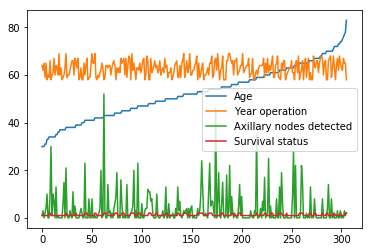

In [8]:
#plotting data
haberman.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ac5a780>,
      dtype=object)

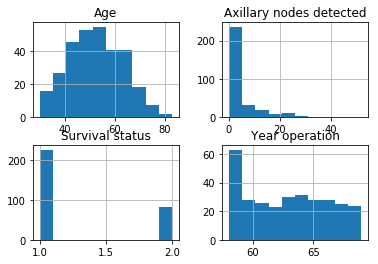

In [9]:
 #histogram of dataset
haberman.hist()

# Bivariate Analysis
 ## 2-D scatter plot:

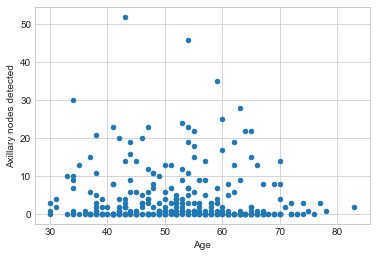

In [10]:
sb.set_style("whitegrid")
haberman.plot(kind="scatter", x="Age", y="Axillary nodes detected")

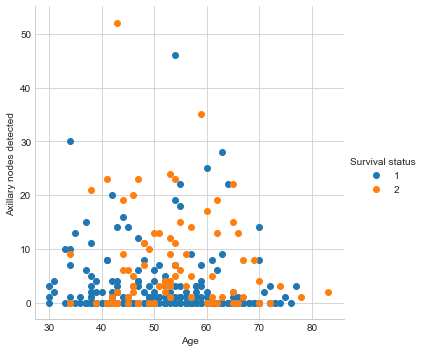

In [11]:
sb.FacetGrid(haberman, hue="Survival status", size=5)\
.map(pl.scatter, "Age", "Axillary nodes detected").add_legend();

## pair plot:

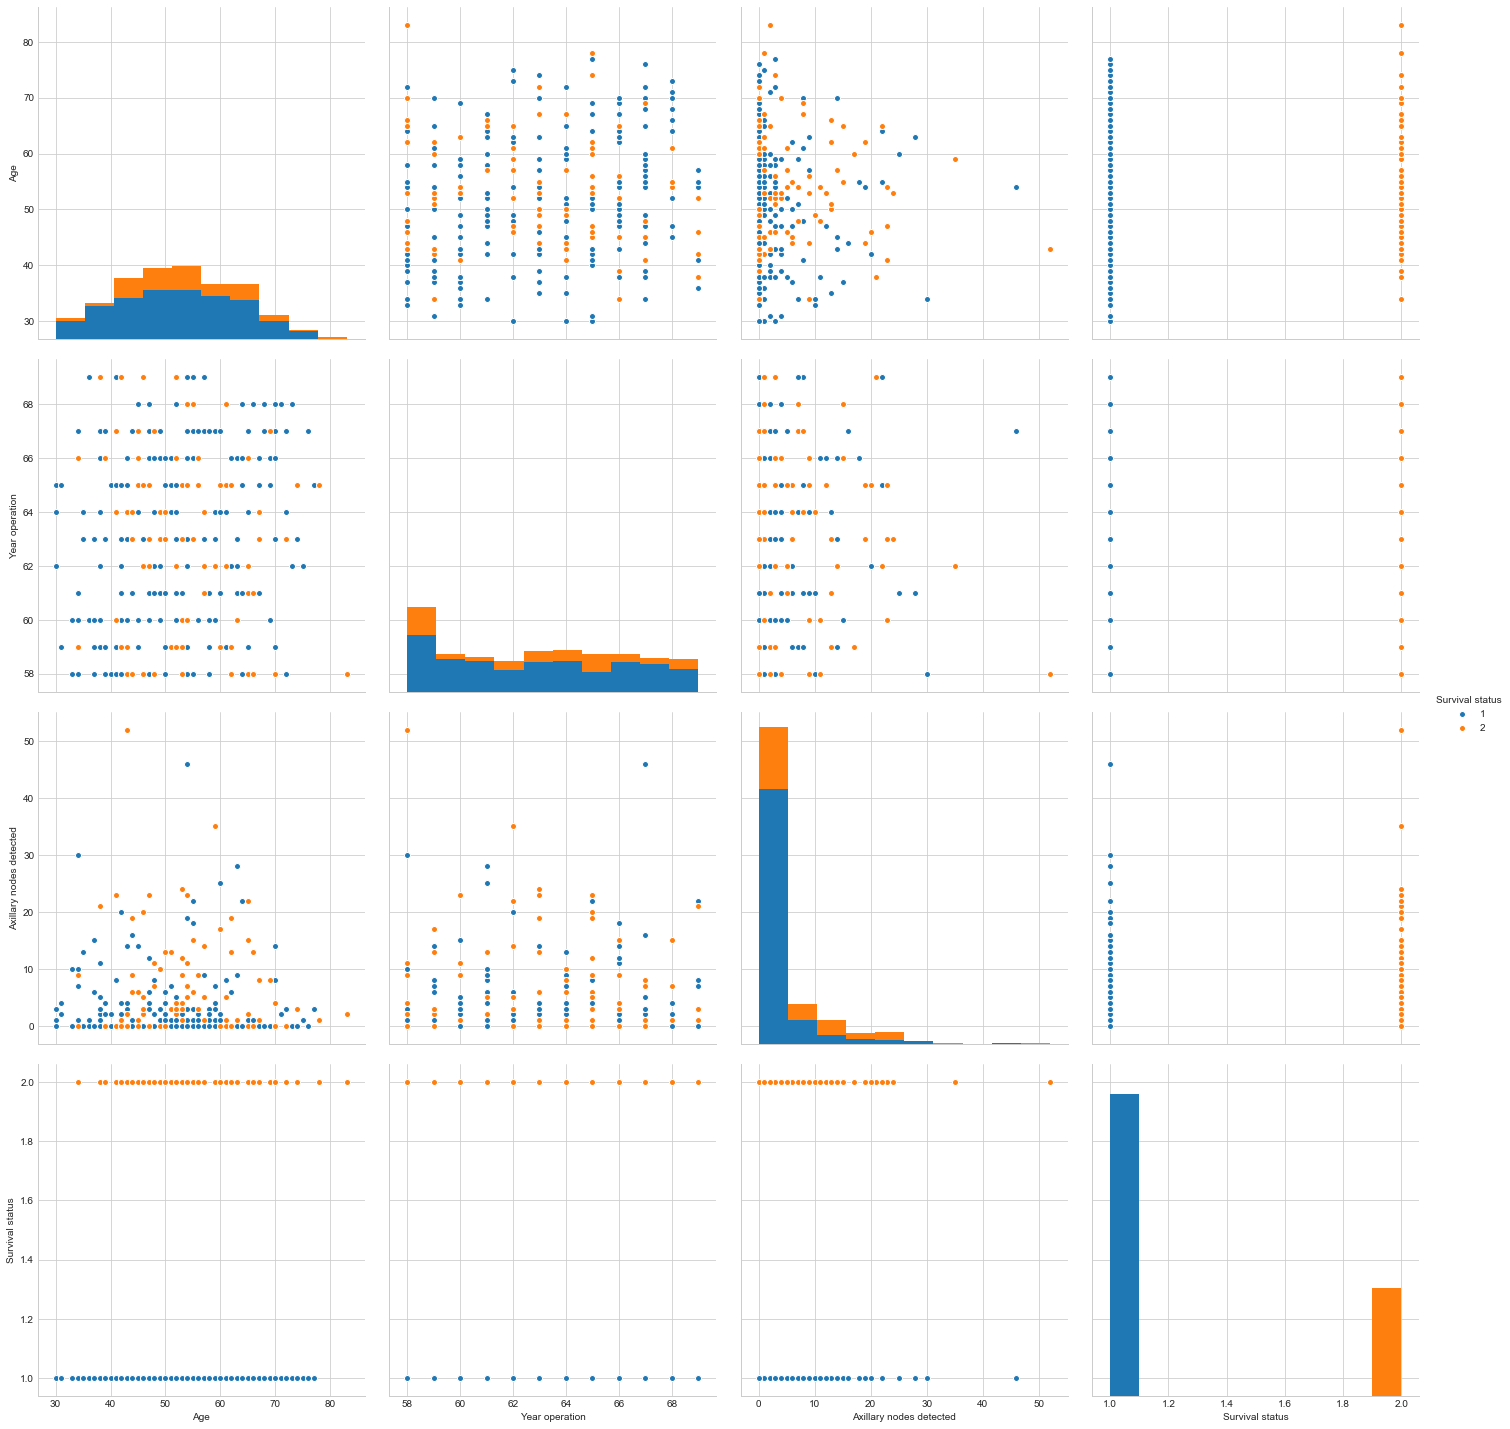

In [12]:
 #plotting wrt age
pl.close();
sb.set_style("whitegrid")
sb.pairplot(haberman,hue='Survival status',size=5)
pl.show()

# Observations
## From the above pair plots:
1. In the above pair of plots when we try to analyse using "Age", "Year operation", "Axillary nodes detected" as attributes, we find there is no good insights in those plots.
2. But in the fourth pairplots i.e "Survival status" as detected attributes and Age attributes distribution seems to be like a normal distribution. so looking at the distribution more closly we can draw some information.
 

## PDF:

/Users/abhilashg/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/abhilashg/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


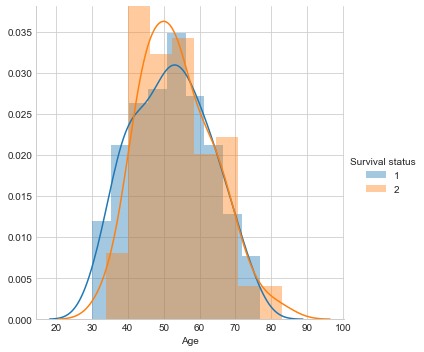

In [13]:
 sb.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sb.distplot, "Age") \
   .add_legend();
pl.show();

/Users/abhilashg/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/abhilashg/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


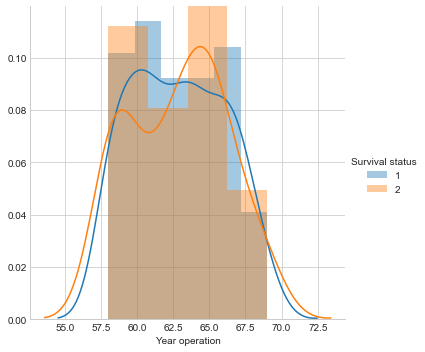

In [14]:
sb.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sb.distplot, "Year operation") \
   .add_legend();
pl.show();

/Users/abhilashg/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/abhilashg/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


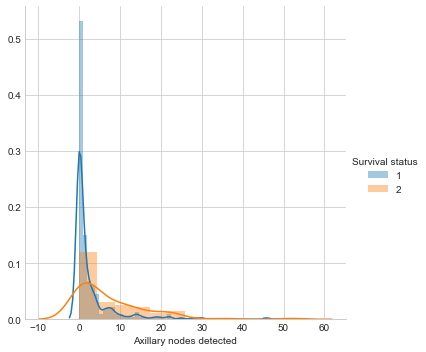

In [15]:
 sb.FacetGrid(haberman, hue="Survival status", size=5) \
   .map(sb.distplot, "Axillary nodes detected") \
   .add_legend();
pl.show();

# Observation:
1. From the above PDFS(Univariate analysis) both Age and Year operation are not good features for useful insights since distibution is more similar for both both the cases.
2. Axillary nodes detected is the only feature that is useful to know the survival status of patients as there is difference between the distributions for both classes in the dataset.
3. For the patients who survived for more than 5yrs, the distribution for Axillary nodes detecteds seems to be more densed and centred at 0 whereas for those who lived less than 5yrs, the distrubtion is more varying and has larger values as well.

## BOXPLOT:

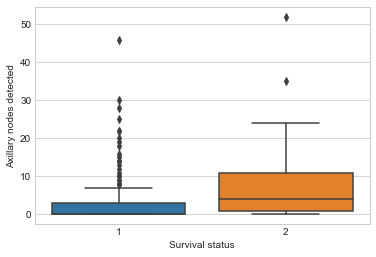

In [16]:
sb.boxplot(x='Survival status',y='Axillary nodes detected', data=haberman)

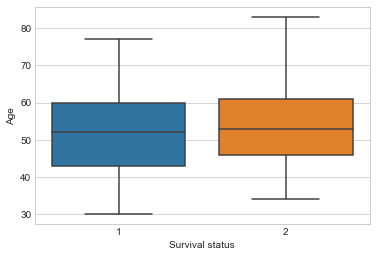

In [17]:
sb.boxplot(x='Survival status',y='Age', data=haberman)

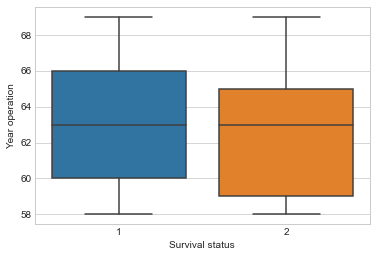

In [18]:
sb.boxplot(x='Survival status',y='Year operation', data=haberman)

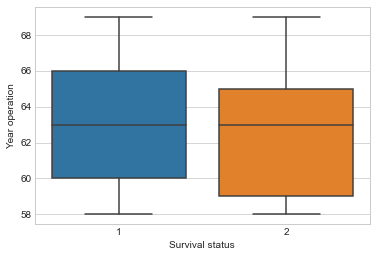

In [19]:
sb.boxplot(x='Survival status',y='Year operation', data=haberman)